In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import cross_validate
from IPython.display import display_html
from itertools import chain,cycle
from statistics import mean
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv('creditcard.csv')
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [4]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# DATA ANALYSIS

In [5]:
#Analysis of entire dataset, features and statistical measurments
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#Quick and summerized overview of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

0    284315
1       492
Name: Class, dtype: int64


<Axes: >

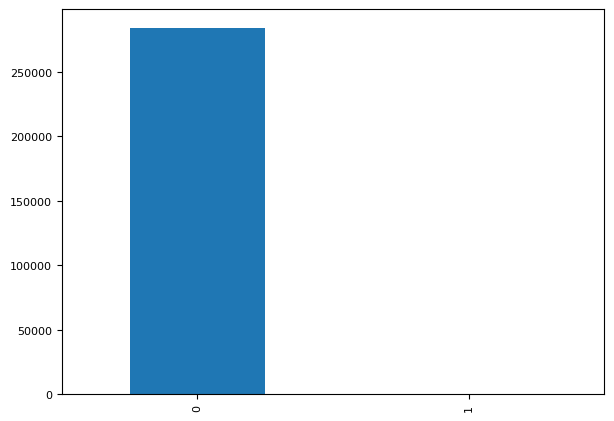

In [8]:
#Plot number of transactions according to the Class
df_class = df['Class'].value_counts()
print(df_class)
df_class.plot(kind='bar', figsize=(7,5), fontsize=8)

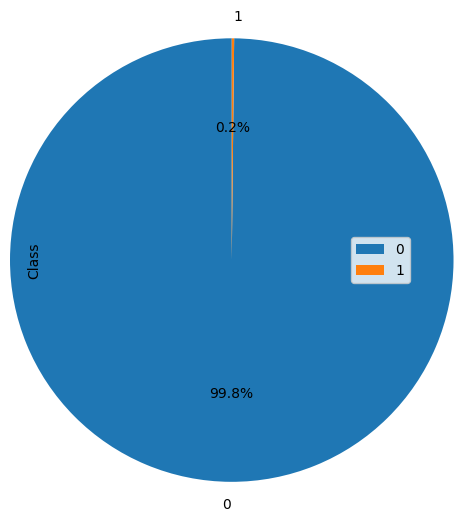

In [9]:
#Plot imbalanced situation in pie chart
plot = df_class.plot(kind = "pie",autopct = '%1.1f%%', radius = 1.5, shadow = False,  legend = True, startangle = 90)
plt.show()

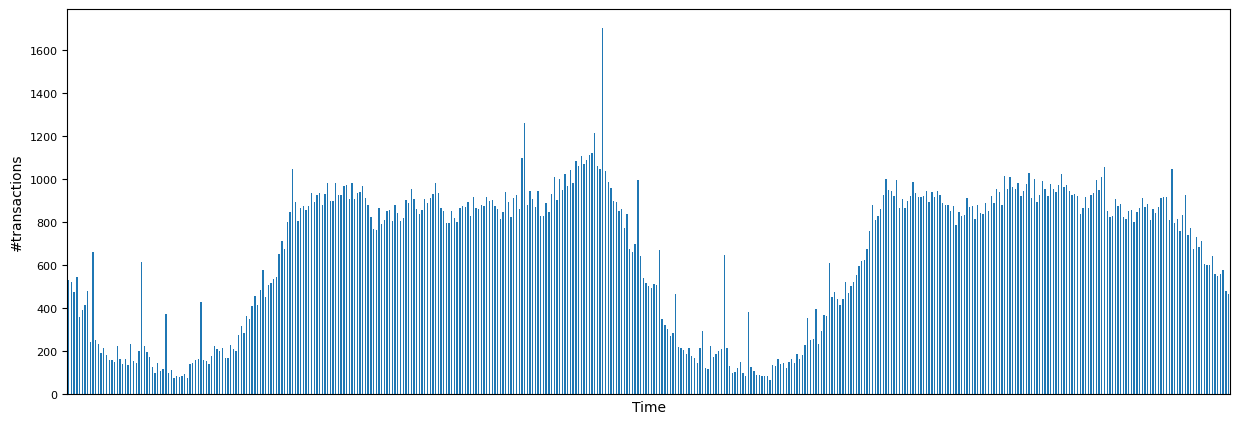

In [10]:
#Plot number of transactions according to time ranges

bins = np.arange(start = 0, stop = 172800, step = 400)

df_time = df['Time'].astype(int)
df_time = df_time.groupby(pd.cut(df_time, bins)).count()
plot = df_time.plot(kind='bar', figsize=(15,5), fontsize=8)
plot.set(xlabel="Time", ylabel="#transactions")
plt.xticks([])
plt.show()

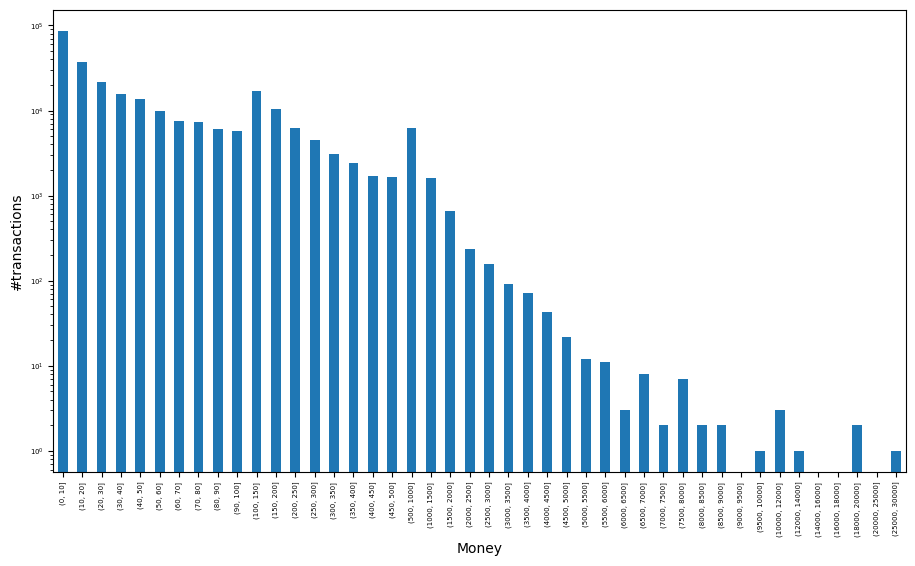

In [11]:
#Plot number of transactions according to money ranges
bins = [0,10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,1000,1500,2000,2500,3000,3500,4000,4500,
        5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,12000,14000,16000,18000,20000,25000,30000]
df_amount = df['Amount'].astype(int)
df_amount = df_amount.groupby(pd.cut(df_amount, bins)).count()
plot = df_amount.plot(kind='bar', figsize=(11,6), logy = True, fontsize=5)
plot.set(xlabel="Money", ylabel="#transactions")
plt.show()

# PREPROCESSING
- No NULL values inside the dataframe
- Drop duplicated rows
- Normalization of numeric features using z-score normalization
- Split dataset in train-set and test-set

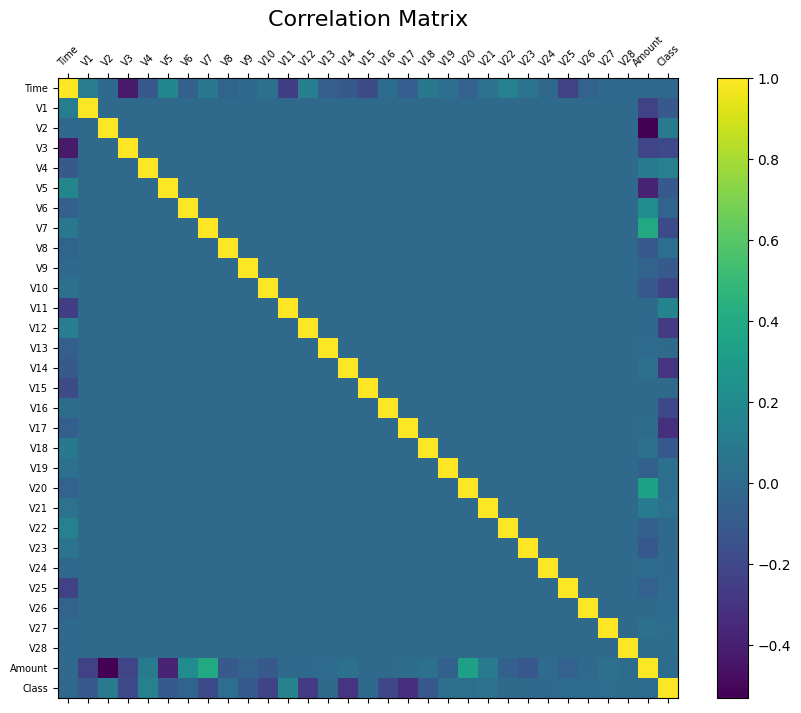

In [12]:
#Check features correlation
f = plt.figure(figsize=(10, 8))
plt.matshow(df.corr(), fignum = f. number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize = 7, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize = 7)
plt.title('Correlation Matrix', fontsize = 16);
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 10)
plt.show()

In [13]:
#Drop duplicates
df.drop_duplicates(inplace = True)
df_class = df['Class'].value_counts()
print(df_class)

0    283253
1       473
Name: Class, dtype: int64


In [14]:
#Normalization
header_names = df.keys()
col_names = np.array(header_names)

numeric_index = list(set(range(30)))
numeric_col = col_names[numeric_index].tolist()

print(f"numeric_cols = {numeric_col}\n")

minmax_scaler = MinMaxScaler().fit(df[numeric_col])
df[numeric_col] = minmax_scaler.transform(df[numeric_col])

numeric_cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']



In [15]:
#Set up k-folds crossvalidation
df_target = df['Class']
df_data = df.drop('Class', axis = 1)

In [16]:
#Support function for the t-test
def t_test(arr_metric_1, arr_metric_2, conf_value):
    
    stat, p_val = ttest_ind(arr_metric_1, arr_metric_2)
    alpha = conf_value #Setting confidence value

    if p_val <= alpha: #If true we reject the NullHypothesis
        print(f"We reject the null hypothesis at a confidence level of {conf_value*100}%")
        auc_mean_1 = mean(arr_metric_1)
        auc_mean_2 = mean(arr_metric_2)
        if(auc_mean_1 > auc_mean_2):
            best = 'First model'
        else:
            best = 'Second_model'

        print("Distributions are statistically different in terms of accuracy [p: " + str(p_val) + "]. The best classifier is the "+ best)

    else:
        print("Cannot reject the null hypothesis")
        print("Distributions are not statistically different [ p: " + str(p_val) + " ]")

# 1) CLASSIFICATION - IMBALANCED DATASET

In [17]:
#StratifiedKFold():
#    shuffle = True --> it mix samples of different classes before the creation of folds
#    random_state = 123 --> it affects the randomness of indexes before the creation of folds
#It mantains the same distribution as possible of classes in each folds.

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)

## LOGISTIC REGRESSION
I use the LogisticRegression() with these parameters:
- max_iter = 1000 ----> The max number of iterations taken by the solver to converge (default solver = "lbfgs")

PRO:
1) Trained very efficiently with a reduced fit-time than other ML algorithms
2) It is explainable, so it is easy to understand how decisions are made

CONS:
1) It requires a large sample size than other ML algorithms
2) It assumes linearity of features

FOLD 1
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.52      0.65        95

    accuracy                           1.00     56746
   macro avg       0.94      0.76      0.82     56746
weighted avg       1.00      1.00      1.00     56746

--------------CONFUSION MATRIX--------------



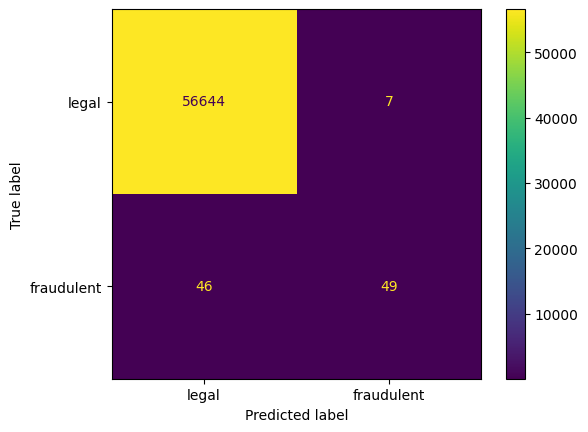

,0,1,macro avg,weighted avg
precision,0.999189,0.875000,0.937094,0.998981
recall,0.999876,0.515789,0.757833,0.999066
f1-score,0.999532,0.649007,0.824270,0.998946
support,56651.000000,95.000000,56746.000000,56746.000000


FOLD 2
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.72      0.38      0.50        94

    accuracy                           1.00     56745
   macro avg       0.86      0.69      0.75     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



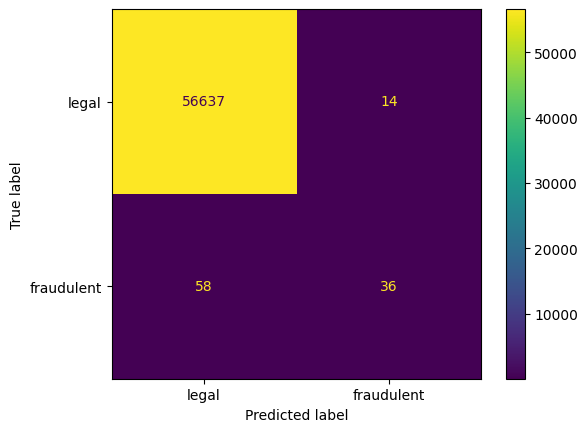

,0,1,macro avg,weighted avg
precision,0.998977,0.720000,0.859488,0.998515
recall,0.999753,0.382979,0.691366,0.998731
f1-score,0.999365,0.500000,0.749682,0.998538
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 3
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.59      0.71        94

    accuracy                           1.00     56745
   macro avg       0.96      0.79      0.86     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



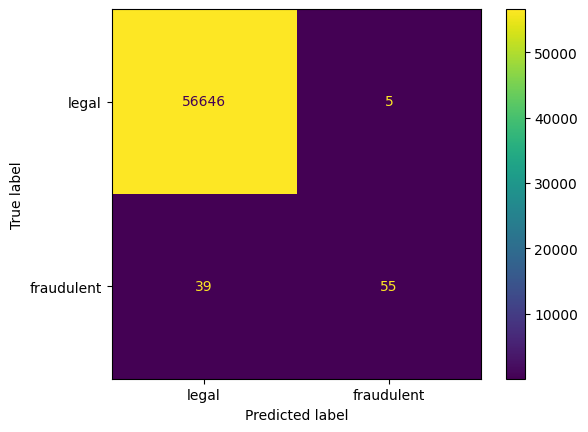

,0,1,macro avg,weighted avg
precision,0.999312,0.916667,0.957989,0.999175
recall,0.999912,0.585106,0.792509,0.999225
f1-score,0.999612,0.714286,0.856949,0.999139
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 4
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.88      0.53      0.66        95

    accuracy                           1.00     56745
   macro avg       0.94      0.76      0.83     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



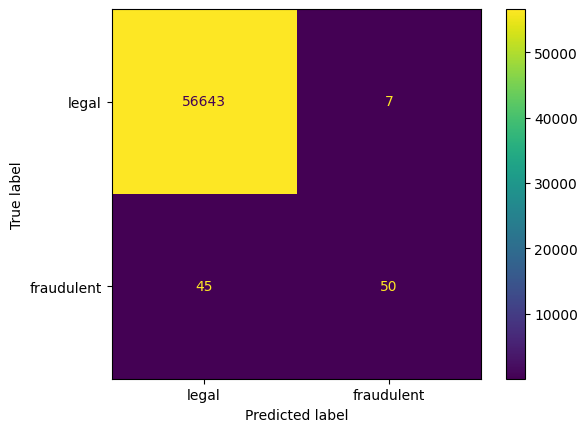

,0,1,macro avg,weighted avg
precision,0.999206,0.877193,0.938200,0.999002
recall,0.999876,0.526316,0.763096,0.999084
f1-score,0.999541,0.657895,0.828718,0.998969
support,56650.000000,95.000000,56745.000000,56745.000000


FOLD 5
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.89      0.59      0.71        95

    accuracy                           1.00     56745
   macro avg       0.94      0.79      0.85     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



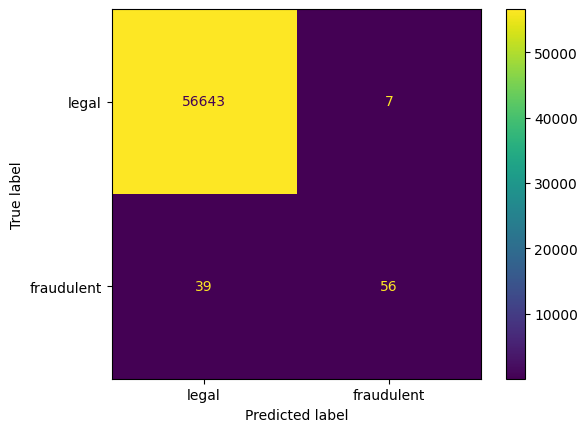

,0,1,macro avg,weighted avg
precision,0.999312,0.888889,0.944100,0.999127
recall,0.999876,0.589474,0.794675,0.999189
f1-score,0.999594,0.708861,0.854227,0.999107
support,56650.000000,95.000000,56745.000000,56745.000000


In [17]:
model = LogisticRegression(max_iter = 1000, random_state = 0)

list_df_metrics = []
fit_time = []
auc_lr = []
acc_lr = []

k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    # fit and predict using classifier
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    
    start = time.time()
    model.fit(X_tr,y_tr)
    end = time.time()
    
    fit_time.append(str(round(end-start, 2)))
    
    y_pred = model.predict(X_te)
    
    auc_lr.append(roc_auc_score(y_pred, y_te))
    
    
    print("--------------CLASSIFICATION REPORT--------------\n")
    cr = classification_report(y_te, y_pred, output_dict = True)
    print(classification_report(y_te, y_pred))
    
    acc_lr.append(cr['accuracy'])
    
    print("--------------CONFUSION MATRIX--------------\n")
    ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels = ['legal','fraudulent'])
    plt.show()
    
    # store per-class metrics as a dataframe
    df_metrics = pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'})
    display(df_metrics)
    list_df_metrics.append(df_metrics)
    k += 1
    

# compute average per-class metrics    
df_concat = pd.concat(list_df_metrics)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_lr_avg_imb = grouped_by_row_index.mean()

#Compute average of accuracy
acc_lr_avg = np.mean(acc_lr)

#Compute average AUC and fit-time
auc_lr_avg = np.mean(auc_lr)
fit_time = [float(i) for i in fit_time]
fit_time_lr_avg = np.mean(fit_time)

## NEURAL NETWORK
#### 1) Trial to find the best configuration of the neural network from 6 differented
#### 2) Use the best model to classify transactions

I use the MLPClassifier with these parameters:
- solver = 'adam' ---> Kind of solver based on stochastic gradient-based optimizer
- max_iter = 200 ----> With this solver it indicates the max number of epochs
- random_state = 0 ---> Seed for the random number generation of initial values of weight and biases

PROS:
1) Learn more complicated class boundaries
2) Good handling of large number of features

CONS:
1) Overfitting problem can be controlled reducing the number of epochs, not specializing too much the model.
2) Hard to implement network due to the choosen parameters hidden layers and number of neurons.

### CROSS VALIDATION ON SIX NEURAL NETWORKS

In [18]:
#Emphirical trials with 6 different configurations of the neural-network
neural_net1 = MLPClassifier(solver = 'adam', max_iter = 200, hidden_layer_sizes = (5), random_state = 0)
neural_net2 = MLPClassifier(solver = 'adam', max_iter = 200, hidden_layer_sizes = (10), random_state = 0)
neural_net3 = MLPClassifier(solver = 'adam', max_iter = 200, hidden_layer_sizes = (5,5), random_state = 0)
neural_net4 = MLPClassifier(solver = 'adam', max_iter = 200, hidden_layer_sizes = (5,10), random_state = 0)
neural_net5 = MLPClassifier(solver = 'adam', max_iter = 200, hidden_layer_sizes = (10,5), random_state = 0)
neural_net6 = MLPClassifier(solver = 'adam', max_iter = 200, hidden_layer_sizes = (10,10), random_state = 0)

#Set up to collect fit_time and metrics of all models
models = [neural_net1, neural_net2, neural_net3, neural_net4, neural_net5, neural_net6]
column_names = ['neural_net1', 'neural_net2', 'neural_net3', 'neural_net4', 'neural_net5', 'neural_net6']

df_fit_time = pd.DataFrame(columns = column_names)
df_metrics = pd.DataFrame(columns = column_names)
df_auc = pd.DataFrame(columns = column_names)
df_acc = pd.DataFrame(columns = column_names)


#Fit and Predict step
k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    list_df_metrics = []
    tmp_time = []
    tmp_auc = []
    tmp_acc = []
    
    for i in models:
        start = time.time()
        i.fit(X_tr,y_tr)
        end = time.time()
        
        tmp_time.append(str(round(end-start, 2)))
    
        y_pred = i.predict(X_te)
        
        tmp_auc.append(roc_auc_score(y_pred, y_te))
    
        cr = classification_report(y_te, y_pred, output_dict = True)
        list_df_metrics.append(pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'}))
        
        tmp_acc.append(cr['accuracy'])
        
        if(len(tmp_time) == 5):
            print(tmp_time)
            
    df_metrics.loc[len(df_metrics.index)] = list_df_metrics
    df_fit_time.loc[len(df_fit_time.index)] = tmp_time
    df_auc.loc[len(df_auc.index)] = tmp_auc
    df_acc.loc[len(df_acc.index)] = tmp_acc
    
    k += 1

FOLD 1
['21.56', '20.48', '36.93', '25.76', '29.59']
FOLD 2
['20.15', '19.7', '35.42', '32.48', '25.88']
FOLD 3
['20.61', '21.99', '50.47', '29.94', '34.87']
FOLD 4
['17.13', '19.89', '36.23', '33.42', '24.63']
FOLD 5
['20.82', '20.4', '34.85', '25.39', '30.69']


In [19]:
#Compute average of performance

nn_fit_time_avg = []
auc_nn_avg = []
acc_nn_avg = []

precis_arr = []
sensit_arr = []
f1score_arr = []

i = 1

#Create average metrics array
for (columnName, columnData) in df_metrics.items(): 
    df_concat = pd.concat(columnData.values)
    grouped_by_row_index = df_concat.groupby(df_concat.index)
    metric_avg = grouped_by_row_index.mean()
    
    precis_arr.append(metric_avg.iloc[1][2])
    sensit_arr.append(metric_avg.iloc[2][2])
    f1score_arr.append(metric_avg.iloc[0][2])
    
    i +=1

#Create average fit-times array
for (columnName, columnData) in df_fit_time.items():
    nn_fit_time_avg.append(columnData.values.astype(float).mean())

#Create average AUCs array
for (columnName, columnData) in df_auc.items():
    auc_nn_avg.append(columnData.values.astype(float).mean())
    
#Create average accuracy array
for (columnName, columnData) in df_acc.items():
    acc_nn_avg.append(columnData.values.astype(float).mean())

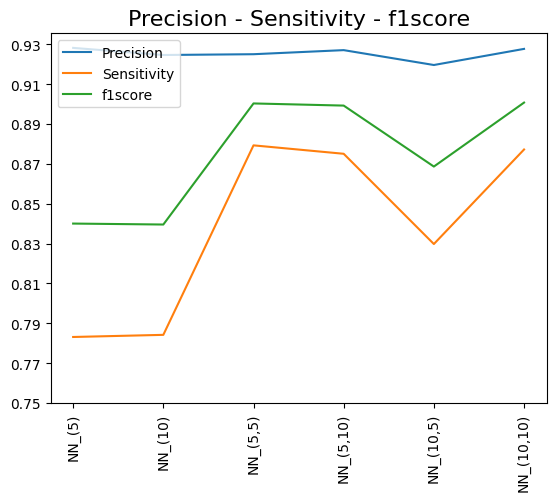

In [20]:
#Plot results of different configuration for neural network

plt.plot(column_names, precis_arr, column_names, sensit_arr, column_names, f1score_arr)
plt.xticks(np.arange(6), ['NN_(5)', 'NN_(10)', 'NN_(5,5)', 'NN_(5,10)', 'NN_(10,5)', 'NN_(10,10)'], rotation = 'vertical')
plt.yticks(np.arange(0.75, 0.94, 0.02))
plt.title('Precision - Sensitivity - f1score', fontsize = 16);
plt.legend(['Precision','Sensitivity','f1score'], loc="upper left")
plt.show()

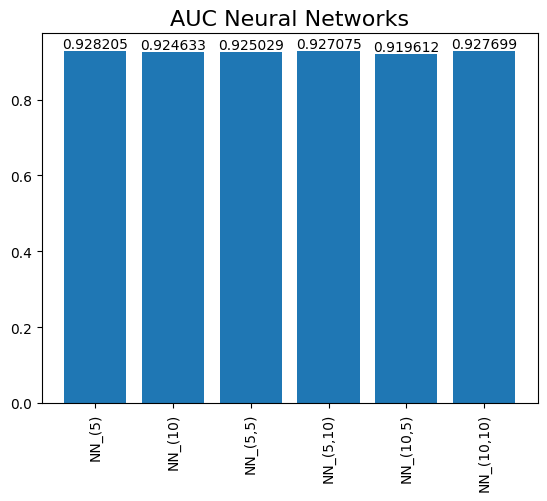

In [21]:
#Plot AUC of different configuration for neural network
fig, ax = plt.subplots()
plot = ax.bar(column_names, auc_nn_avg)
ax.bar_label(plot)
plt.xticks(np.arange(6), ['NN_(5)', 'NN_(10)', 'NN_(5,5)', 'NN_(5,10)', 'NN_(10,5)', 'NN_(10,10)'], rotation = 'vertical')
plt.title('AUC Neural Networks', fontsize = 16);
plt.show()

In [22]:
#Prepare AUC vector of the best network for t-test
best_nn_auc = []

for obj in df_auc['neural_net6'].items():
    print(obj)
    best_nn_auc.append(obj[1])

(0, 0.9174352729390588)
(1, 0.904798582142664)
(2, 0.9292264487863625)
(3, 0.9366139364925183)
(4, 0.9504231571681805)


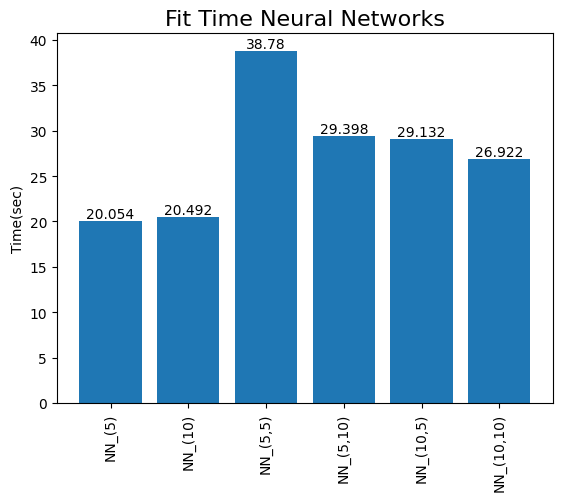

In [24]:
#Plot fit time of different configuration for neural network
fig, ax = plt.subplots()
plot = plt.bar(column_names, nn_fit_time_avg)
ax.bar_label(plot)
plt.xticks(np.arange(6), ['NN_(5)', 'NN_(10)', 'NN_(5,5)', 'NN_(5,10)', 'NN_(10,5)', 'NN_(10,10)'], rotation = 'vertical')
plt.title('Fit Time Neural Networks', fontsize = 16);
plt.ylabel("Time(sec)")
plt.show()

## RANDOM FOREST
I use the RandomForestClassifier() with these parameters:
- max_depth = 20 ---> Maximum depth of the tree
- random_state = 0 ---> Controls both the randomness of the bootstrapping of the samples used when building trees and the sampling of the features to consider when looking for the best split

PROS:
1) One of the most accurate learning algorithms
2) RF runs efficiently on large databases

CONS:
1) RFs have been observed to overfit for some datasets with noisy classification/regression tasks

FOLD 1
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.93      0.79      0.85        95

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746

--------------CONFUSION MATRIX--------------



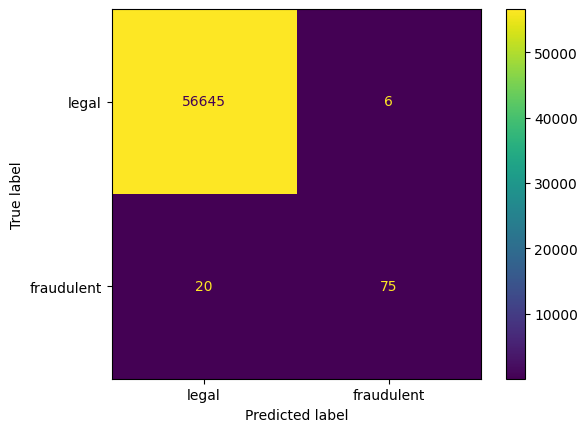

,0,1,macro avg,weighted avg
precision,0.999647,0.925926,0.962786,0.999524
recall,0.999894,0.789474,0.894684,0.999542
f1-score,0.999771,0.852273,0.926022,0.999524
support,56651.000000,95.000000,56746.000000,56746.000000


FOLD 2
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.94      0.68      0.79        94

    accuracy                           1.00     56745
   macro avg       0.97      0.84      0.89     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



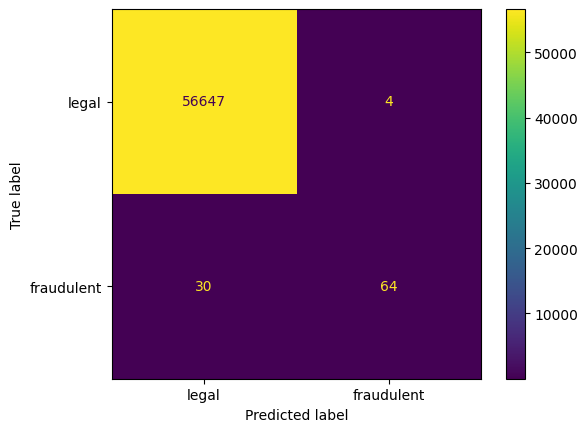

,0,1,macro avg,weighted avg
precision,0.999471,0.941176,0.970324,0.999374
recall,0.999929,0.680851,0.840390,0.999401
f1-score,0.999700,0.790123,0.894912,0.999353
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 3
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.81      0.86        94

    accuracy                           1.00     56745
   macro avg       0.96      0.90      0.93     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



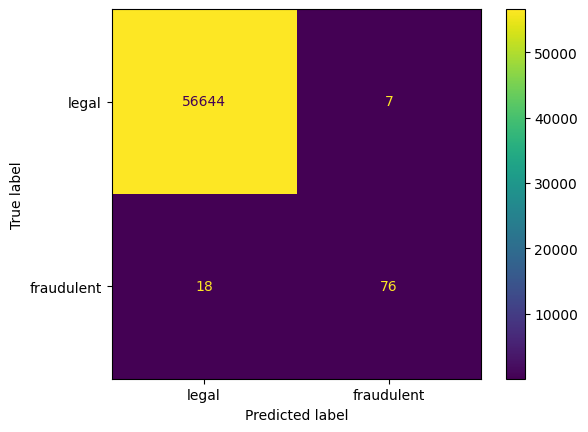

,0,1,macro avg,weighted avg
precision,0.999682,0.915663,0.957672,0.999543
recall,0.999876,0.808511,0.904194,0.999559
f1-score,0.999779,0.858757,0.929268,0.999546
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 4
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.95      0.82      0.88        95

    accuracy                           1.00     56745
   macro avg       0.98      0.91      0.94     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



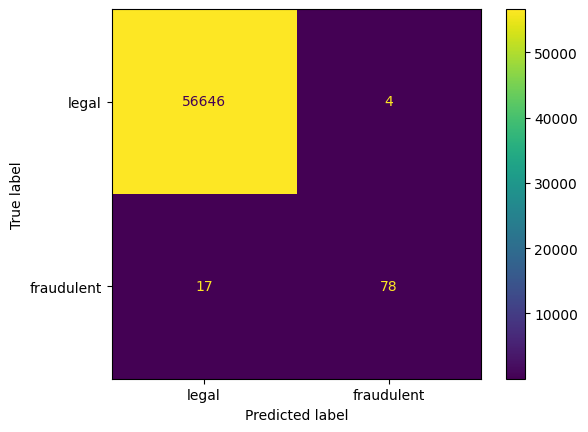

,0,1,macro avg,weighted avg
precision,0.999700,0.951220,0.975460,0.999619
recall,0.999929,0.821053,0.910491,0.999630
f1-score,0.999815,0.881356,0.940585,0.999616
support,56650.000000,95.000000,56745.000000,56745.000000


FOLD 5
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.96      0.75      0.84        95

    accuracy                           1.00     56745
   macro avg       0.98      0.87      0.92     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



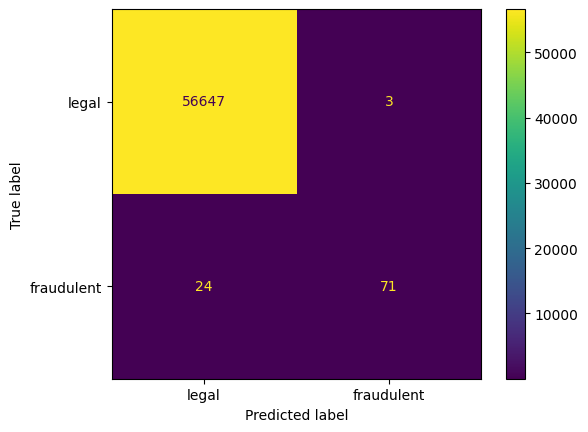

,0,1,macro avg,weighted avg
precision,0.999577,0.959459,0.979518,0.999509
recall,0.999947,0.747368,0.873658,0.999524
f1-score,0.999762,0.840237,0.919999,0.999495
support,56650.000000,95.000000,56745.000000,56745.000000


In [25]:
random_for = RandomForestClassifier(max_depth = 20, random_state = 0)

list_df_metrics = []
fit_time = []
auc_rf = []
acc_rf = []

k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    #Fit and predict using classifier
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    
    start = time.time()
    random_for.fit(X_tr,y_tr)
    end = time.time()
    
    fit_time.append(str(round(end-start, 2)))
    
    y_pred = random_for.predict(X_te)
    
    auc_rf.append(roc_auc_score(y_pred, y_te))
    
    print("--------------CLASSIFICATION REPORT--------------\n")
    cr = classification_report(y_te, y_pred, output_dict = True)
    print(classification_report(y_te, y_pred))
    
    acc_rf.append(cr['accuracy'])
    
    print("--------------CONFUSION MATRIX--------------\n")
    ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels = ['legal','fraudulent'])
    plt.show()
    
    #Store per-class metrics as a dataframe
    df_metrics = pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'})
    display(df_metrics)
    list_df_metrics.append(df_metrics)
    k += 1
    

#Compute average per-class metrics    
df_concat = pd.concat(list_df_metrics)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_rf_avg_imb = grouped_by_row_index.mean()

#Compute average accuracy
acc_rf_avg = np.mean(acc_rf)

#Compute average of AUC and fit-time
auc_rf_avg = np.mean(auc_rf)            
fit_time = [float(i) for i in fit_time]
fit_time_rf_avg = np.mean(fit_time)

## PERFORMANCE EVALUATION

In [26]:
# Support display function
def display_side_by_side(*args, titles = cycle([''])):
    html_str = ''
    for df, title in zip(args, chain(titles, cycle(['</br>'])) ):
        html_str += '<th style="text-align:center"><td style="vertical-align:top">'
        html_str += f'<h2 style="text-align: center;">{title}</h2>'
        html_str += df.to_html().replace('table','table style="display:inline"')
        html_str += '</td></th>'
    display_html(html_str, raw = True)

In [27]:
def print_auc_acc_metrics(auc_lr, auc_nn, auc_rf, acc_lr, acc_nn, acc_rf):
    print("\n\n---------------AUC EVALUATION----------------\n")
    print(f"AUC LOGISTIC-REGRESSION: {auc_lr}\n")
    print(f"AUC NEURAL NETWORK: {auc_nn}\n")
    print(f"AUC RANDOM FOREST: {auc_rf}\n")

    print("\n\n---------------ACCURACY EVALUATION----------------\n")
    print(f"ACCURACY LOGISTIC-REGRESSION: {acc_lr}\n")
    print(f"ACCURACY NEURAL NETWORK: {acc_nn}\n")
    print(f"ACCURACY RANDOM FOREST: {acc_rf}\n")

In [28]:
display_side_by_side(df_lr_avg_imb,df_rf_avg_imb, titles = ['Logistic Regression', 'Random Forest'])

print(f"neural_net(10,10):\nf1-score = {f1score_arr[5]}\nprecision = {precis_arr[5]}\nsensitivity = {sensit_arr[5]}")

print_auc_acc_metrics(auc_lr_avg, auc_nn_avg[5], auc_rf_avg, acc_lr_avg, acc_nn_avg[5], acc_rf_avg)

,0,1,macro avg,weighted avg
f1-score,0.999529,0.646010,0.822769,0.998940
precision,0.999199,0.855550,0.927374,0.998960
recall,0.999859,0.519933,0.759896,0.999059
support,56650.600000,94.600000,56745.200000,56745.200000
,0,1,macro avg,weighted avg
f1-score,0.999765,0.844549,0.922157,0.999507
precision,0.999615,0.938689,0.969152,0.999514
recall,0.999915,0.769451,0.884683,0.999531
support,56650.600000,94.600000,56745.200000,56745.200000


neural_net(10,10):
f1-score = 0.9007572806492956
precision = 0.9276994795057568
sensitivity = 0.8772177159930585


---------------AUC EVALUATION----------------

AUC LOGISTIC-REGRESSION: 0.9273744208905954

AUC NEURAL NETWORK: 0.9276994795057568

AUC RANDOM FOREST: 0.9691520562311373



---------------ACCURACY EVALUATION----------------

ACCURACY LOGISTIC-REGRESSION: 0.9990589512167999

ACCURACY NEURAL NETWORK: 0.9993796833893761

ACCURACY RANDOM FOREST: 0.999531237847148



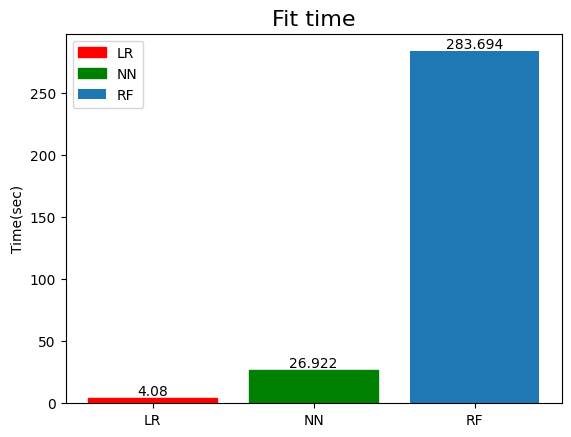

In [29]:
#Plot fit-time of three selected models
fig, ax = plt.subplots()
plot = plt.bar([1,2,3], [fit_time_lr_avg, nn_fit_time_avg[5], fit_time_rf_avg], label = ['LR', 'NN', 'RF'])
ax.bar_label(plot)
plot[0].set_color('r')
plot[1].set_color('g')
plt.legend(loc = 'best')
plt.xticks([1,2,3],['LR', 'NN', 'RF'])
plt.title('Fit time', fontsize = 16);
plt.ylabel('Time(sec)')
plt.show()

## T-TEST ON 2 BEST CLASSIFIERS (AUC)

In [30]:
#Neural Network vs Random Forest
t_test(best_nn_auc, auc_rf, 0.05)

We reject the null hypothesis at a confidence level of 5.0%
Distributions are statistically different in terms of accuracy [p: 0.0015208999350977527]. The best classifier is the Second_model


# 2) CLASSIFICATION - REBALANCED DATASET

## PRELIMINARY REBALANCE STEP

RandomUnderSampler(), RandomOverSampler():
- Function to under-sample the majority class and over-sample the minority class by picking samples at random with replacement.
- sampling_strategy ---> it sets the class to undersample or to oversample

In [31]:
under_sampler = RandomUnderSampler(sampling_strategy = 'majority')
over_sampler = RandomOverSampler(sampling_strategy = 'minority')

## LOGISTIC REGRESSION - OVERSAMPLING

FOLD 1
0    226602
1    226602
Name: Class, dtype: int64
0    56651
1       95
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.07      0.89      0.13        95

    accuracy                           0.98     56746
   macro avg       0.53      0.94      0.56     56746
weighted avg       1.00      0.98      0.99     56746

--------------CONFUSION MATRIX--------------



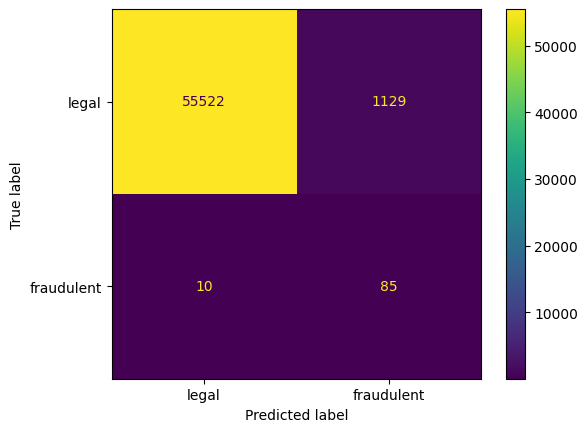

,0,1,macro avg,weighted avg
precision,0.999820,0.070016,0.534918,0.998263
recall,0.980071,0.894737,0.937404,0.979928
f1-score,0.989847,0.129870,0.559859,0.988407
support,56651.000000,95.000000,56746.000000,56746.000000


FOLD 2
0    226602
1    226602
Name: Class, dtype: int64
0    56651
1       94
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.07      0.85      0.13        94

    accuracy                           0.98     56745
   macro avg       0.53      0.92      0.56     56745
weighted avg       1.00      0.98      0.99     56745

--------------CONFUSION MATRIX--------------



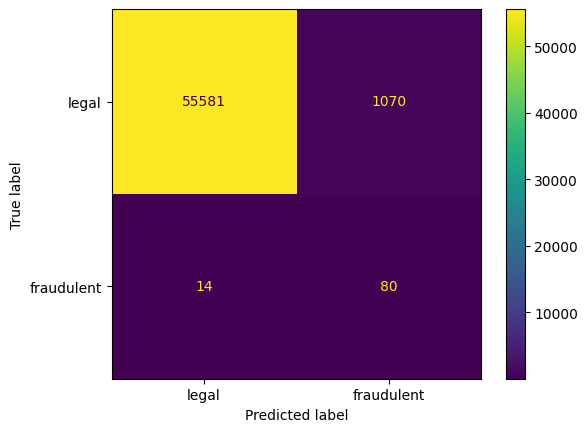

,0,1,macro avg,weighted avg
precision,0.999748,0.069565,0.534657,0.998207
recall,0.981112,0.851064,0.916088,0.980897
f1-score,0.990343,0.128617,0.559480,0.988915
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 3
0    226602
1    226602
Name: Class, dtype: int64
0    56651
1       94
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.94      0.11        94

    accuracy                           0.98     56745
   macro avg       0.53      0.96      0.55     56745
weighted avg       1.00      0.98      0.99     56745

--------------CONFUSION MATRIX--------------



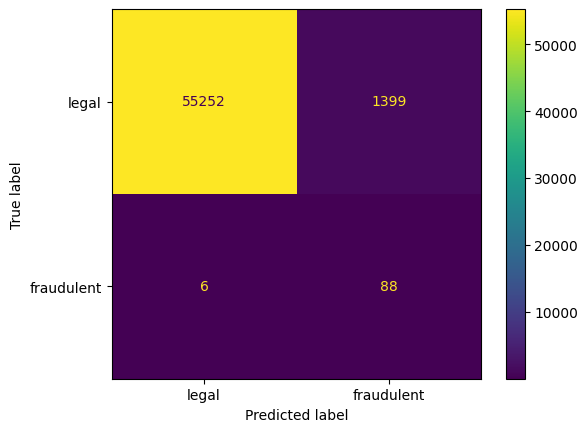

,0,1,macro avg,weighted avg
precision,0.999891,0.059180,0.529535,0.998333
recall,0.975305,0.936170,0.955738,0.975240
f1-score,0.987445,0.111322,0.549384,0.985994
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 4
0    226603
1    226603
Name: Class, dtype: int64
0    56650
1       95
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56650
           1       0.06      0.91      0.11        95

    accuracy                           0.98     56745
   macro avg       0.53      0.94      0.55     56745
weighted avg       1.00      0.98      0.99     56745

--------------CONFUSION MATRIX--------------



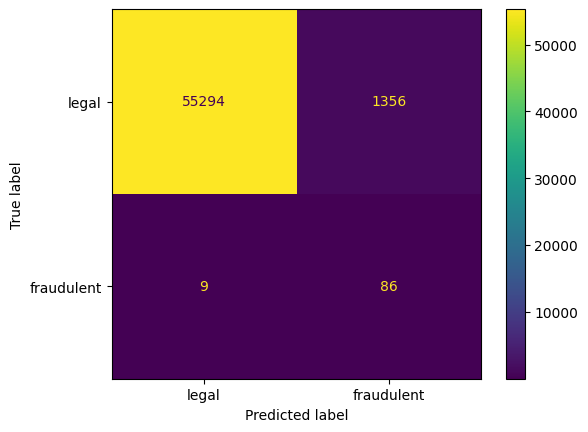

,0,1,macro avg,weighted avg
precision,0.999837,0.059639,0.529738,0.998263
recall,0.976064,0.905263,0.940663,0.975945
f1-score,0.987807,0.111906,0.549857,0.986341
support,56650.000000,95.000000,56745.000000,56745.000000


FOLD 5
0    226603
1    226603
Name: Class, dtype: int64
0    56650
1       95
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56650
           1       0.07      0.95      0.13        95

    accuracy                           0.98     56745
   macro avg       0.54      0.96      0.56     56745
weighted avg       1.00      0.98      0.99     56745

--------------CONFUSION MATRIX--------------



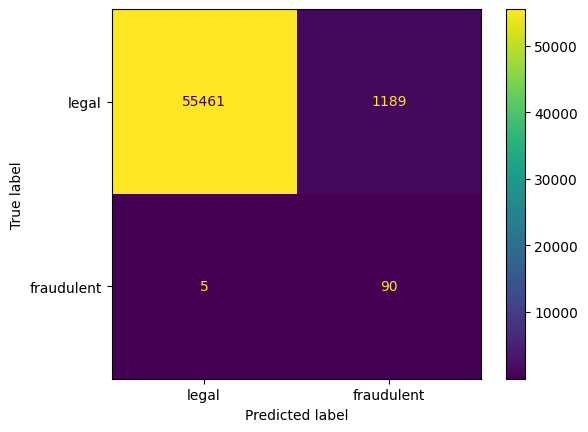

,0,1,macro avg,weighted avg
precision,0.999910,0.070367,0.535139,0.998354
recall,0.979011,0.947368,0.963190,0.978958
f1-score,0.989350,0.131004,0.560177,0.987913
support,56650.000000,95.000000,56745.000000,56745.000000


In [32]:
model = LogisticRegression(max_iter = 1000, random_state = 0)

list_df_metrics = []
fit_time = []
auc_lr = []
acc_lr = []

k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    X_tr_over, y_tr_over = over_sampler.fit_resample(X_tr, y_tr)
    
    print(y_tr_over.value_counts())
    print(y_te.value_counts())
    
    start = time.time()
    model.fit(X_tr_over,y_tr_over)
    end = time.time()
    
    fit_time.append(str(round(end-start, 2)))
    
    y_pred = model.predict(X_te)
    
    auc_lr.append(roc_auc_score(y_pred, y_te))
    
    print("--------------CLASSIFICATION REPORT--------------\n")
    cr = classification_report(y_te, y_pred, output_dict = True)
    print(classification_report(y_te, y_pred))
    
    print("--------------CONFUSION MATRIX--------------\n")
    ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels = ['legal','fraudulent'])
    plt.show()
    
    #Store accuracy
    acc_lr.append(cr['accuracy'])
    
    #Store per-class metrics as a dataframe
    df_metrics = pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'})
    display(df_metrics)
    list_df_metrics.append(df_metrics)
    k += 1
    

#Compute average per-class metrics    
df_concat = pd.concat(list_df_metrics)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_lr_avg = grouped_by_row_index.mean()

#Compute average accuracy
acc_lr_avg = np.mean(acc_lr)


#Compute average AUC and fit time
auc_lr_avg = np.mean(auc_lr)

fit_time = [float(i) for i in fit_time]
fit_time_lr_avg = np.mean(fit_time)

## NEURAL NETWORK - OVERSAMPLING

FOLD 1
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56651
           1       0.05      0.88      0.09        95

    accuracy                           0.97     56746
   macro avg       0.52      0.93      0.54     56746
weighted avg       1.00      0.97      0.98     56746

--------------CONFUSION MATRIX--------------



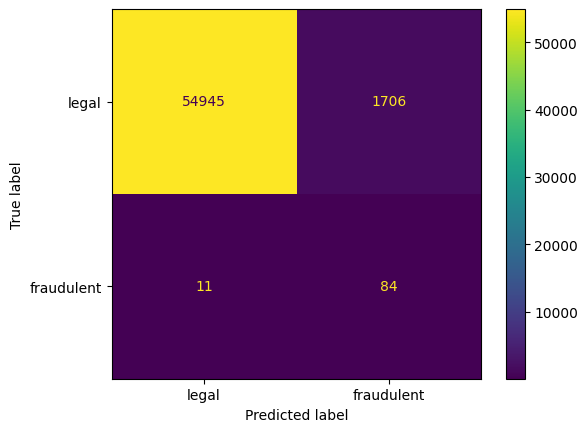

,0,1,macro avg,weighted avg
precision,0.999800,0.046927,0.523364,0.998205
recall,0.969886,0.884211,0.927048,0.969742
f1-score,0.984616,0.089125,0.536870,0.983116
support,56651.000000,95.000000,56746.000000,56746.000000


FOLD 2
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56651
           1       0.02      0.91      0.03        94

    accuracy                           0.91     56745
   macro avg       0.51      0.91      0.49     56745
weighted avg       1.00      0.91      0.95     56745

--------------CONFUSION MATRIX--------------



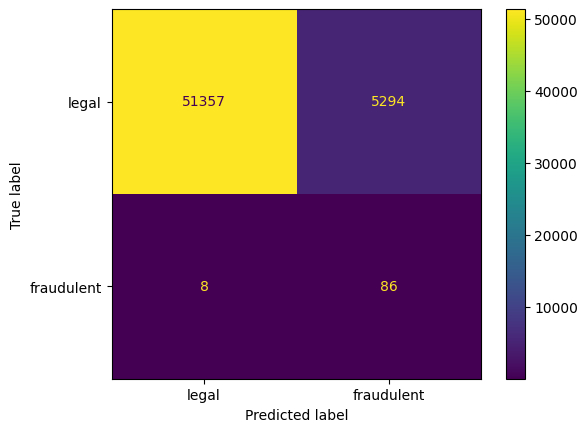

,0,1,macro avg,weighted avg
precision,0.999844,0.015985,0.507915,0.998214
recall,0.906551,0.914894,0.910722,0.906564
f1-score,0.950915,0.031421,0.491168,0.949392
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 3


/home/charlie-3/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56651
           1       0.03      0.91      0.06        94

    accuracy                           0.95     56745
   macro avg       0.52      0.93      0.52     56745
weighted avg       1.00      0.95      0.98     56745

--------------CONFUSION MATRIX--------------



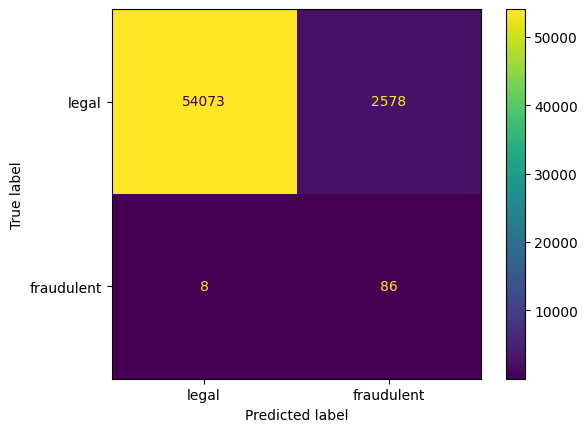

,0,1,macro avg,weighted avg
precision,0.999852,0.032282,0.516067,0.998249
recall,0.954493,0.914894,0.934693,0.954428
f1-score,0.976646,0.062364,0.519505,0.975132
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 4
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56650
           1       0.02      0.92      0.05        95

    accuracy                           0.94     56745
   macro avg       0.51      0.93      0.51     56745
weighted avg       1.00      0.94      0.97     56745

--------------CONFUSION MATRIX--------------



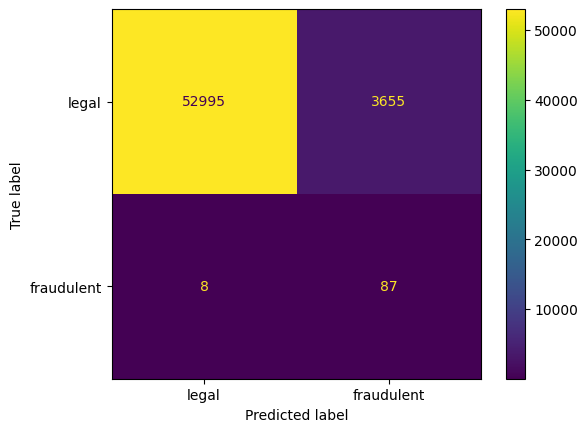

,0,1,macro avg,weighted avg
precision,0.999849,0.023250,0.511549,0.998214
recall,0.935481,0.915789,0.925635,0.935448
f1-score,0.966595,0.045348,0.505971,0.965052
support,56650.000000,95.000000,56745.000000,56745.000000


FOLD 5
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56650
           1       0.03      0.96      0.05        95

    accuracy                           0.94     56745
   macro avg       0.51      0.95      0.51     56745
weighted avg       1.00      0.94      0.97     56745

--------------CONFUSION MATRIX--------------



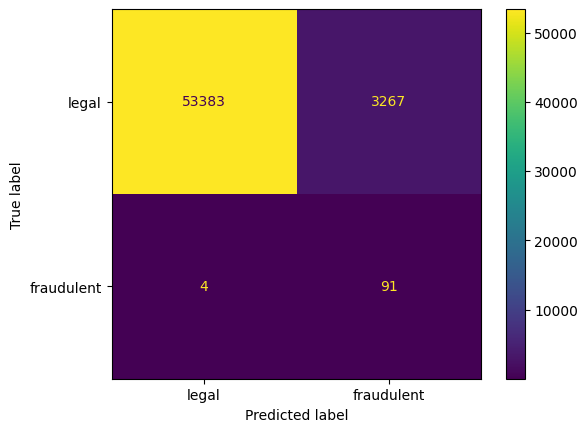

,0,1,macro avg,weighted avg
precision,0.999925,0.027099,0.513512,0.998296
recall,0.942330,0.957895,0.950112,0.942356
f1-score,0.970274,0.052708,0.511491,0.968737
support,56650.000000,95.000000,56745.000000,56745.000000


In [33]:
neural_net = MLPClassifier(solver = 'adam', max_iter = 200, hidden_layer_sizes = (10,10), random_state = 0)

list_df_metrics = []
fit_time = []
acc_nn = []
auc_nn = []

k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    X_tr_over, y_tr_over = over_sampler.fit_resample(X_tr, y_tr)

    start = time.time()
    neural_net.fit(X_tr_over, y_tr_over)
    end = time.time()
    
    fit_time.append(str(round(end-start, 2)))
    
    y_pred = neural_net.predict(X_te)
    
    auc_nn.append(roc_auc_score(y_pred, y_te))

    print("--------------CLASSIFICATION REPORT--------------\n")
    cr = classification_report(y_te, y_pred, output_dict = True)
    print(classification_report(y_te, y_pred))
    
    print("--------------CONFUSION MATRIX--------------\n")
    ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels = ['legal','fraudulent'])
    plt.show()
    
    #Store accuracy both on test-set
    acc_nn.append(cr['accuracy'])
    
    #Store per-class metrics as a dataframe
    df_metrics = pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'})
    display(df_metrics)
    list_df_metrics.append(df_metrics)
    k += 1
    

#Compute average per-class metrics    
df_concat = pd.concat(list_df_metrics)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_nn_avg = grouped_by_row_index.mean()

#Compute average accuracy
nn_acc_avg = np.mean(acc_nn)

#Compute average AUC and fit time
auc_nn_avg = np.mean(auc_nn)

fit_time = [float(i) for i in fit_time]
fit_time_nn_avg = np.mean(fit_time)

## RANDOM FOREST - OVERSAMPLING

FOLD 1
0    226602
1    226602
Name: Class, dtype: int64
0    56651
1       95
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.93      0.79      0.85        95

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746

--------------CONFUSION MATRIX--------------



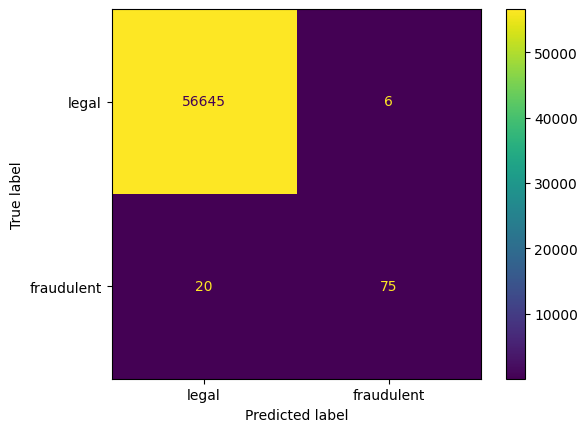

,0,1,macro avg,weighted avg
precision,0.999647,0.925926,0.962786,0.999524
recall,0.999894,0.789474,0.894684,0.999542
f1-score,0.999771,0.852273,0.926022,0.999524
support,56651.000000,95.000000,56746.000000,56746.000000


FOLD 2
0    226602
1    226602
Name: Class, dtype: int64
0    56651
1       94
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.69      0.79        94

    accuracy                           1.00     56745
   macro avg       0.96      0.85      0.89     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



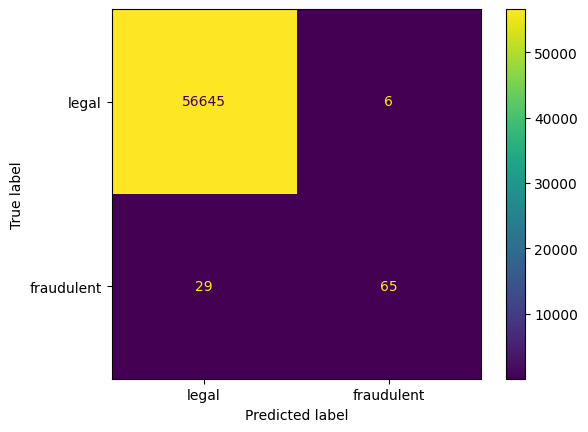

,0,1,macro avg,weighted avg
precision,0.999488,0.915493,0.957491,0.999349
recall,0.999894,0.691489,0.845692,0.999383
f1-score,0.999691,0.787879,0.893785,0.999340
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 3
0    226602
1    226602
Name: Class, dtype: int64
0    56651
1       94
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.94      0.81      0.87        94

    accuracy                           1.00     56745
   macro avg       0.97      0.90      0.93     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



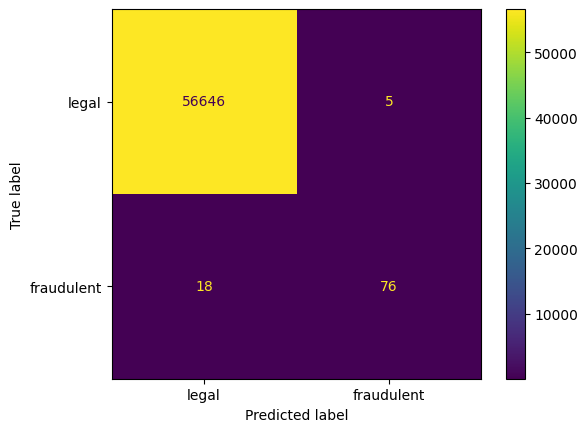

,0,1,macro avg,weighted avg
precision,0.999682,0.938272,0.968977,0.999581
recall,0.999912,0.808511,0.904211,0.999595
f1-score,0.999797,0.868571,0.934184,0.999580
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 4
0    226603
1    226603
Name: Class, dtype: int64
0    56650
1       95
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.94      0.82      0.88        95

    accuracy                           1.00     56745
   macro avg       0.97      0.91      0.94     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



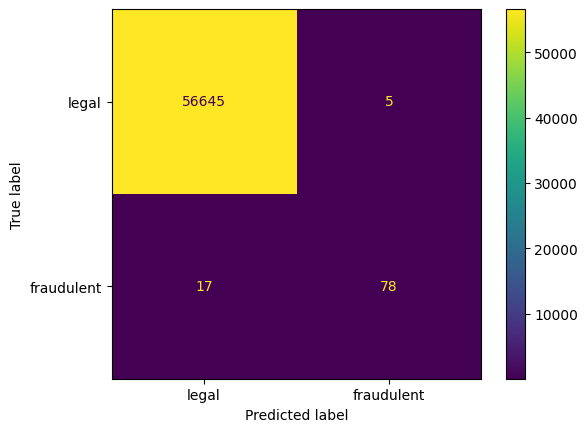

,0,1,macro avg,weighted avg
precision,0.999700,0.939759,0.969730,0.999600
recall,0.999912,0.821053,0.910482,0.999612
f1-score,0.999806,0.876404,0.938105,0.999599
support,56650.000000,95.000000,56745.000000,56745.000000


FOLD 5
0    226603
1    226603
Name: Class, dtype: int64
0    56650
1       95
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.95      0.77      0.85        95

    accuracy                           1.00     56745
   macro avg       0.97      0.88      0.92     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



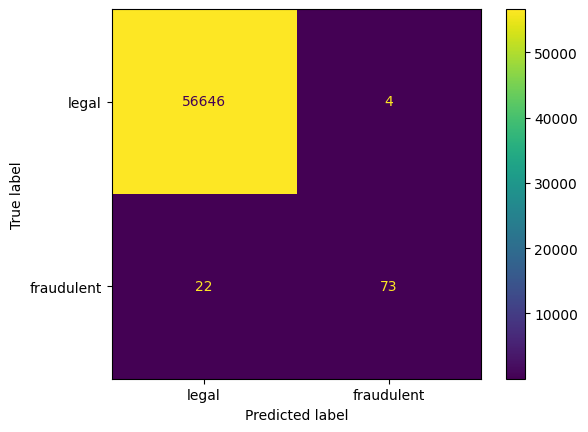

,0,1,macro avg,weighted avg
precision,0.999612,0.948052,0.973832,0.999525
recall,0.999929,0.768421,0.884175,0.999542
f1-score,0.999771,0.848837,0.924304,0.999518
support,56650.000000,95.000000,56745.000000,56745.000000


In [34]:
random_for = RandomForestClassifier(max_depth = 20, random_state = 0)

list_df_metrics = []
fit_time = []
auc_rf = []
acc_rf = []

k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    X_tr_over, y_tr_over = over_sampler.fit_resample(X_tr, y_tr)
    
    print(y_tr_over.value_counts())
    print(y_te.value_counts())
    
    start = time.time()
    random_for.fit(X_tr_over, y_tr_over)
    end = time.time()
    
    fit_time.append(str(round(end-start, 2)))

    y_pred = random_for.predict(X_te)
    
    auc_rf.append(roc_auc_score(y_pred, y_te))
    
    print("--------------CLASSIFICATION REPORT--------------\n")
    cr = classification_report(y_te, y_pred, output_dict = True)
    print(classification_report(y_te, y_pred))
    
    print("--------------CONFUSION MATRIX--------------\n")
    ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels = ['legal','fraudulent'])
    plt.show()
    
    #Store accuracy for test-set
    acc_rf.append(cr['accuracy'])
    
    #Store per-class metrics as a dataframe
    df_metrics = pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'})
    display(df_metrics)
    list_df_metrics.append(df_metrics)
    k += 1
    

#Compute average per-class metrics    
df_concat = pd.concat(list_df_metrics)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_rf_avg = grouped_by_row_index.mean()

#Compute average accuracy
acc_rf_avg = np.mean(acc_rf)

#Compute average AUC and fit time
auc_rf_avg = np.mean(auc_rf)

fit_time = [float(i) for i in fit_time]
fit_time_rf_avg = np.mean(fit_time)

## PERFORMANCE EVALUATION

In [35]:
display_side_by_side(df_lr_avg, df_nn_avg, titles = ['Logistic Regression', 'Neural Net'])
display_side_by_side(df_rf_avg, titles = ['Random Forest'])

print_auc_acc_metrics(auc_lr_avg, auc_nn_avg, auc_rf_avg, acc_lr_avg, nn_acc_avg, acc_rf_avg)

,0,1,macro avg,weighted avg
f1-score,0.988958,0.122544,0.555751,0.987514
precision,0.999841,0.065754,0.532797,0.998284
recall,0.978313,0.906920,0.942617,0.978194
support,56650.600000,94.600000,56745.200000,56745.200000
,0,1,macro avg,weighted avg
f1-score,0.969809,0.056193,0.513001,0.968286
precision,0.999854,0.029109,0.514481,0.998236
recall,0.941748,0.917536,0.929642,0.941708
support,56650.600000,94.600000,56745.200000,56745.200000


,0,1,macro avg,weighted avg
f1-score,0.999767,0.846793,0.923280,0.999512
precision,0.999626,0.933500,0.966563,0.999516
recall,0.999908,0.775789,0.887849,0.999535
support,56650.600000,94.600000,56745.200000,56745.200000




---------------AUC EVALUATION----------------

AUC LOGISTIC-REGRESSION: 0.5327974748083599

AUC NEURAL NETWORK: 0.5144814155882766

AUC RANDOM FOREST: 0.96656309098888



---------------ACCURACY EVALUATION----------------

ACCURACY LOGISTIC-REGRESSION: 0.9781937441956096

ACCURACY NEURAL NETWORK: 0.9417077460838463

ACCURACY RANDOM FOREST: 0.999534762386755



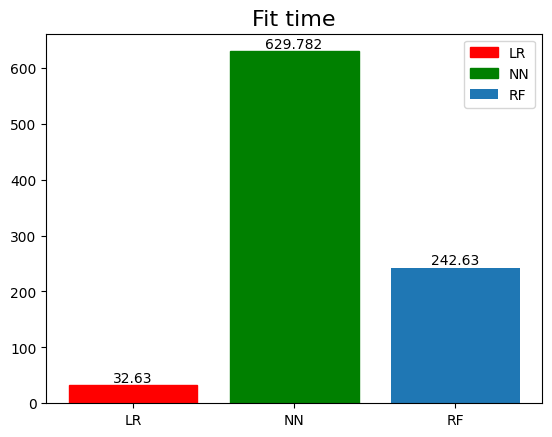

In [36]:
#Plot fit-time of three selected models
fig, ax = plt.subplots()
plot = plt.bar([1,2,3], [fit_time_lr_avg, fit_time_nn_avg, fit_time_rf_avg], label = ['LR', 'NN', 'RF'])
ax.bar_label(plot)
plot[0].set_color('r')
plot[1].set_color('g')
plt.legend(loc = 'best')
plt.xticks([1,2,3], ['LR', 'NN', 'RF'])
plt.title('Fit time', fontsize = 16);
plt.show()

## T-TEST ON 2 BEST CLASSIFIERS (AUC)

In [37]:
#Random Forest vs Logistic Regression
t_test(auc_rf, auc_lr, 0.05)

We reject the null hypothesis at a confidence level of 5.0%
Distributions are statistically different in terms of accuracy [p: 8.692430287146586e-15]. The best classifier is the First model


## LOGISTIC REGRESSION - UNDERSAMPLING

FOLD 1
0    378
1    378
Name: Class, dtype: int64
0    56651
1       95
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.36      0.83      0.51        95

    accuracy                           1.00     56746
   macro avg       0.68      0.91      0.75     56746
weighted avg       1.00      1.00      1.00     56746

--------------CONFUSION MATRIX--------------



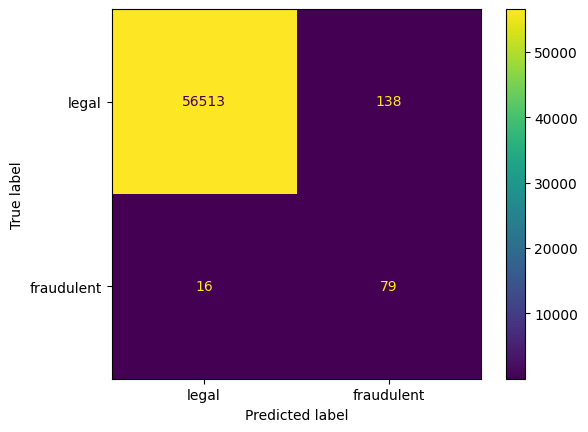

,0,1,macro avg,weighted avg
precision,0.999717,0.364055,0.681886,0.998653
recall,0.997564,0.831579,0.914571,0.997286
f1-score,0.998639,0.506410,0.752525,0.997815
support,56651.000000,95.000000,56746.000000,56746.000000


FOLD 2
0    379
1    379
Name: Class, dtype: int64
0    56651
1       94
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.32      0.78      0.46        94

    accuracy                           1.00     56745
   macro avg       0.66      0.89      0.73     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



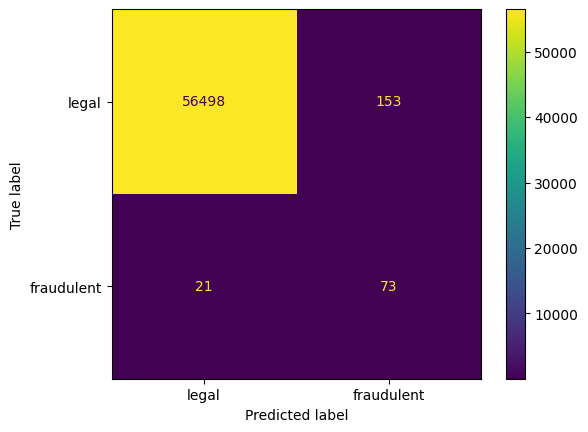

,0,1,macro avg,weighted avg
precision,0.999628,0.323009,0.661319,0.998508
recall,0.997299,0.776596,0.886947,0.996934
f1-score,0.998462,0.456250,0.727356,0.997564
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 3
0    379
1    379
Name: Class, dtype: int64
0    56651
1       94
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.26      0.90      0.40        94

    accuracy                           1.00     56745
   macro avg       0.63      0.95      0.70     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



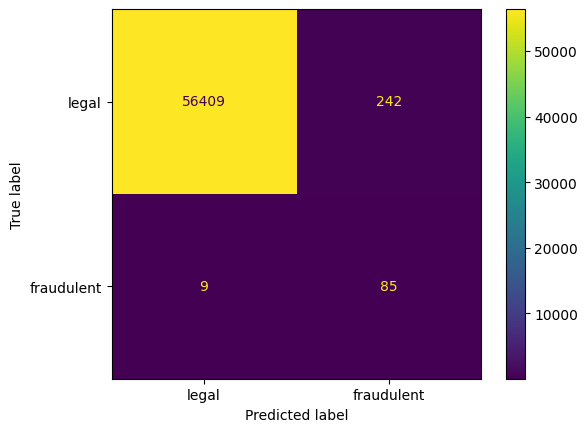

,0,1,macro avg,weighted avg
precision,0.999840,0.259939,0.629890,0.998615
recall,0.995728,0.904255,0.949992,0.995577
f1-score,0.997780,0.403800,0.700790,0.996796
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 4
0    378
1    378
Name: Class, dtype: int64
0    56650
1       95
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.32      0.86      0.46        95

    accuracy                           1.00     56745
   macro avg       0.66      0.93      0.73     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



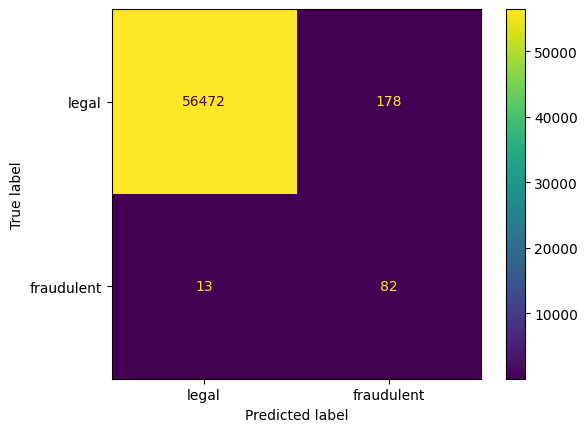

,0,1,macro avg,weighted avg
precision,0.999770,0.315385,0.657577,0.998624
recall,0.996858,0.863158,0.930008,0.996634
f1-score,0.998312,0.461972,0.730142,0.997414
support,56650.000000,95.000000,56745.000000,56745.000000


FOLD 5
0    378
1    378
Name: Class, dtype: int64
0    56650
1       95
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.34      0.86      0.49        95

    accuracy                           1.00     56745
   macro avg       0.67      0.93      0.74     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



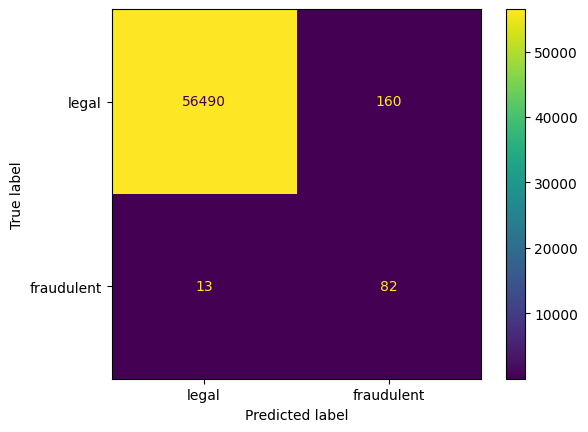

,0,1,macro avg,weighted avg
precision,0.999770,0.338843,0.669306,0.998663
recall,0.997176,0.863158,0.930167,0.996951
f1-score,0.998471,0.486647,0.742559,0.997614
support,56650.000000,95.000000,56745.000000,56745.000000


In [38]:
model = LogisticRegression(max_iter = 1000, random_state = 0)

list_df_metrics = []
fit_time = []
auc_lr = []
acc_lr = []

k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    X_tr_under, y_tr_under = under_sampler.fit_resample(X_tr, y_tr)
    
    print(y_tr_under.value_counts())
    print(y_te.value_counts())
    
    start = time.time()
    model.fit(X_tr_under,y_tr_under)
    end = time.time()
    
    fit_time.append(str(round(end-start, 2)))
    
    y_pred = model.predict(X_te)
    
    auc_lr.append(roc_auc_score(y_pred, y_te))
    
    print("--------------CLASSIFICATION REPORT--------------\n")
    cr = classification_report(y_te, y_pred, output_dict = True)
    print(classification_report(y_te, y_pred))
    
    print("--------------CONFUSION MATRIX--------------\n")
    ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels = ['legal','fraudulent'])
    plt.show()
    
    #Store accuracy
    acc_lr.append(cr['accuracy'])
    
    #Store per-class metrics as a dataframe
    df_metrics = pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'})
    display(df_metrics)
    list_df_metrics.append(df_metrics)
    k += 1
    

#Compute average per-class metrics    
df_concat = pd.concat(list_df_metrics)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_lr_avg = grouped_by_row_index.mean()

#Compute average accuracy
acc_lr_avg = np.mean(acc_lr)

#Compute average AUC and it time
auc_lr_avg = np.mean(auc_lr) 
fit_time = [float(i) for i in fit_time]
fit_time_lr_avg = np.mean(fit_time)

## NEURAL NETWORK - UNDERSAMPLING

FOLD 1
0    378
1    378
Name: Class, dtype: int64
0    56651
1       95
Name: Class, dtype: int64


/home/charlie-3/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.32      0.84      0.47        95

    accuracy                           1.00     56746
   macro avg       0.66      0.92      0.73     56746
weighted avg       1.00      1.00      1.00     56746

--------------CONFUSION MATRIX--------------



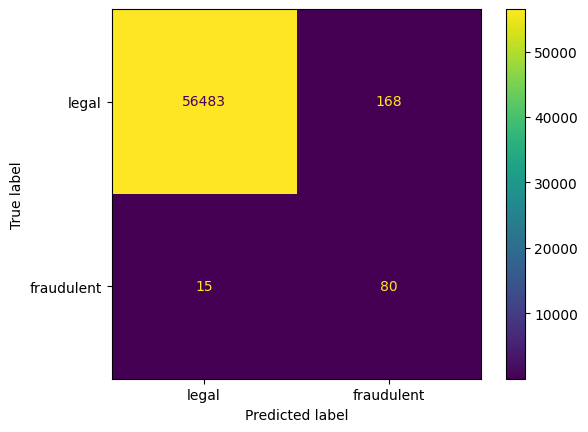

,0,1,macro avg,weighted avg
precision,0.999735,0.322581,0.661158,0.998601
recall,0.997034,0.842105,0.919570,0.996775
f1-score,0.998383,0.466472,0.732427,0.997492
support,56651.000000,95.000000,56746.000000,56746.000000


FOLD 2
0    379
1    379
Name: Class, dtype: int64
0    56651
1       94
Name: Class, dtype: int64


/home/charlie-3/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.31      0.78      0.45        94

    accuracy                           1.00     56745
   macro avg       0.66      0.89      0.72     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



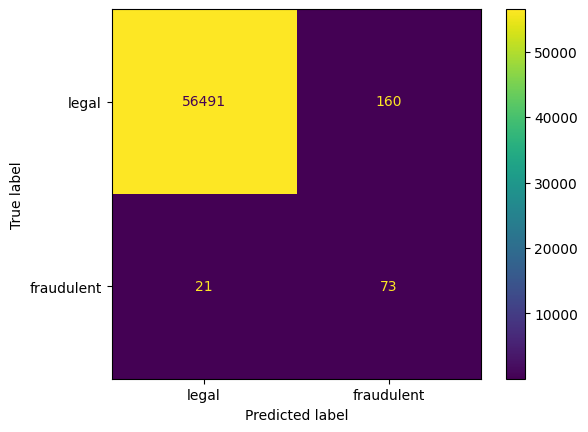

,0,1,macro avg,weighted avg
precision,0.999628,0.313305,0.656467,0.998491
recall,0.997176,0.776596,0.886886,0.996810
f1-score,0.998401,0.446483,0.722442,0.997486
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 3
0    379
1    379
Name: Class, dtype: int64
0    56651
1       94
Name: Class, dtype: int64


/home/charlie-3/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.35      0.89      0.50        94

    accuracy                           1.00     56745
   macro avg       0.67      0.95      0.75     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



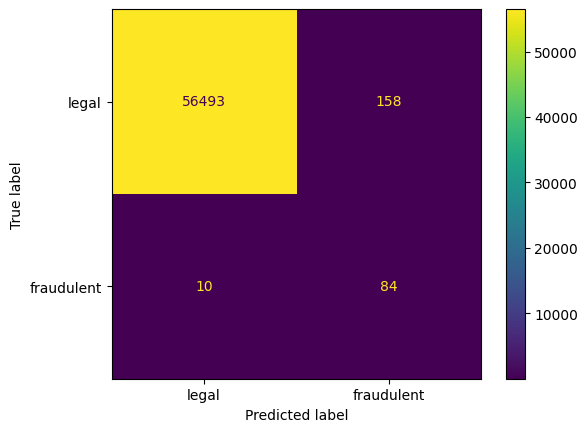

,0,1,macro avg,weighted avg
precision,0.999823,0.347107,0.673465,0.998742
recall,0.997211,0.893617,0.945414,0.997039
f1-score,0.998515,0.500000,0.749258,0.997689
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 4
0    378
1    378
Name: Class, dtype: int64
0    56650
1       95
Name: Class, dtype: int64


/home/charlie-3/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.34      0.85      0.49        95

    accuracy                           1.00     56745
   macro avg       0.67      0.92      0.74     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



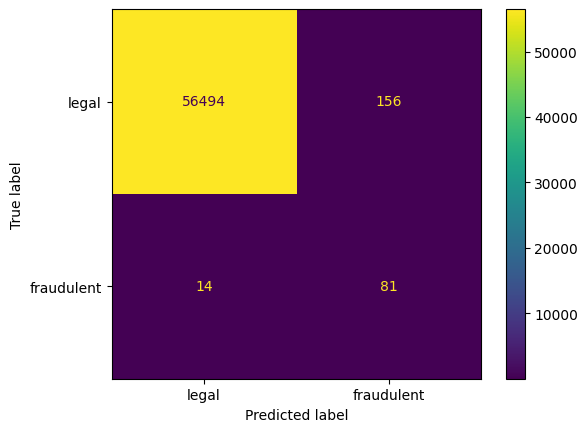

,0,1,macro avg,weighted avg
precision,0.999752,0.341772,0.670762,0.998651
recall,0.997246,0.852632,0.924939,0.997004
f1-score,0.998498,0.487952,0.743225,0.997643
support,56650.000000,95.000000,56745.000000,56745.000000


FOLD 5
0    378
1    378
Name: Class, dtype: int64
0    56650
1       95
Name: Class, dtype: int64


/home/charlie-3/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.48      0.82      0.60        95

    accuracy                           1.00     56745
   macro avg       0.74      0.91      0.80     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



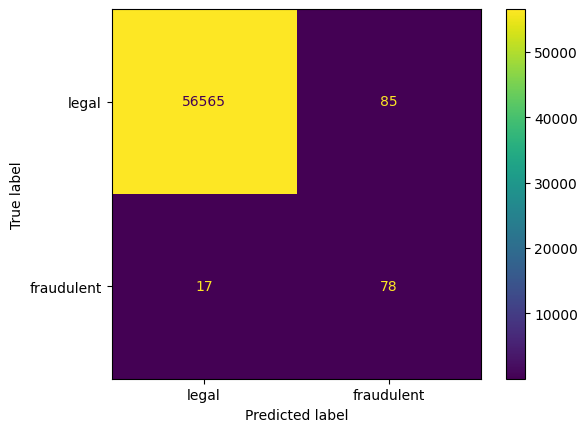

,0,1,macro avg,weighted avg
precision,0.999700,0.478528,0.739114,0.998827
recall,0.998500,0.821053,0.909776,0.998202
f1-score,0.999099,0.604651,0.801875,0.998439
support,56650.000000,95.000000,56745.000000,56745.000000


In [39]:
neural_net = MLPClassifier(solver = 'adam', max_iter = 200, hidden_layer_sizes = (10,10), random_state = 0)

list_df_metrics = []
fit_time = []
auc_nn = []
acc_nn = []

k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    X_tr_under, y_tr_under = under_sampler.fit_resample(X_tr, y_tr)
    
    print(y_tr_under.value_counts())
    print(y_te.value_counts())

    start = time.time()
    neural_net.fit(X_tr_under, y_tr_under)
    end = time.time()
    
    fit_time.append(str(round(end-start, 2)))

    y_pred = neural_net.predict(X_te)

    auc_nn.append(roc_auc_score(y_pred, y_te))
    
    print("--------------CLASSIFICATION REPORT--------------\n")
    cr = classification_report(y_te, y_pred, output_dict = True)
    print(classification_report(y_te, y_pred))
    
    print("--------------CONFUSION MATRIX--------------\n")
    ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels = ['legal','fraudulent'])
    plt.show()
    
    #Store accuracy for test-set
    acc_nn.append(cr['accuracy'])
    
    #Store per-class metrics as a dataframe
    df_metrics = pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'})
    display(df_metrics)
    list_df_metrics.append(df_metrics)
    k += 1
    

#Compute average per-class metrics    
df_concat = pd.concat(list_df_metrics)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_nn_avg = grouped_by_row_index.mean()

#Compute average accuracy
acc_nn_avg = np.mean(acc_nn)

#Compute average AUC and fit time
auc_nn_avg = np.mean(auc_nn) 

fit_time = [float(i) for i in fit_time]
fit_time_nn_avg = np.mean(fit_time)

## RANDOM FOREST - UNDERSAMPLING

FOLD 1
0    378
1    378
Name: Class, dtype: int64
0    56651
1       95
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56651
           1       0.05      0.89      0.09        95

    accuracy                           0.97     56746
   macro avg       0.52      0.93      0.54     56746
weighted avg       1.00      0.97      0.98     56746

--------------CONFUSION MATRIX--------------



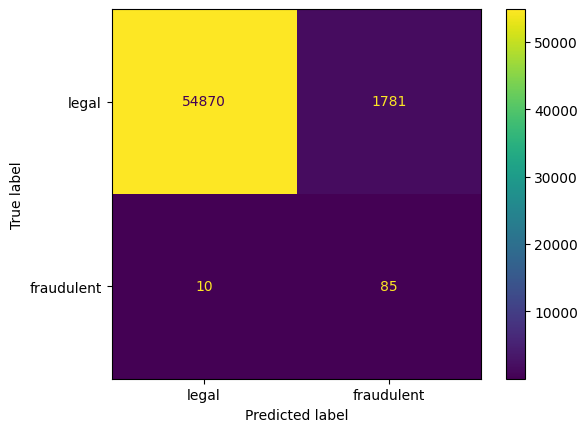

,0,1,macro avg,weighted avg
precision,0.999818,0.045552,0.522685,0.998220
recall,0.968562,0.894737,0.931649,0.968438
f1-score,0.983942,0.086690,0.535316,0.982440
support,56651.000000,95.000000,56746.000000,56746.000000


FOLD 2
0    379
1    379
Name: Class, dtype: int64
0    56651
1       94
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.84      0.10        94

    accuracy                           0.97     56745
   macro avg       0.53      0.91      0.54     56745
weighted avg       1.00      0.97      0.99     56745

--------------CONFUSION MATRIX--------------



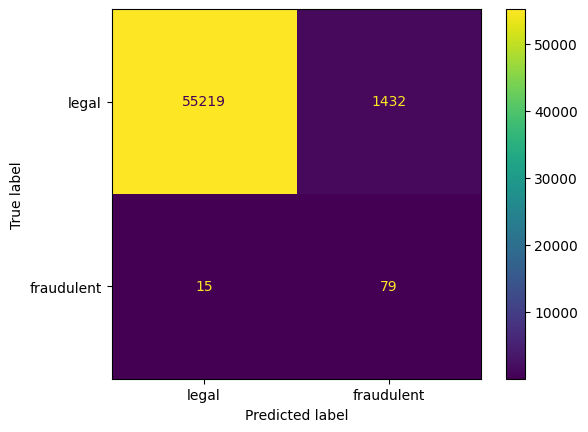

,0,1,macro avg,weighted avg
precision,0.999728,0.052283,0.526006,0.998159
recall,0.974722,0.840426,0.907574,0.974500
f1-score,0.987067,0.098442,0.542755,0.985595
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 3
0    379
1    379
Name: Class, dtype: int64
0    56651
1       94
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.07      0.93      0.12        94

    accuracy                           0.98     56745
   macro avg       0.53      0.95      0.56     56745
weighted avg       1.00      0.98      0.99     56745

--------------CONFUSION MATRIX--------------



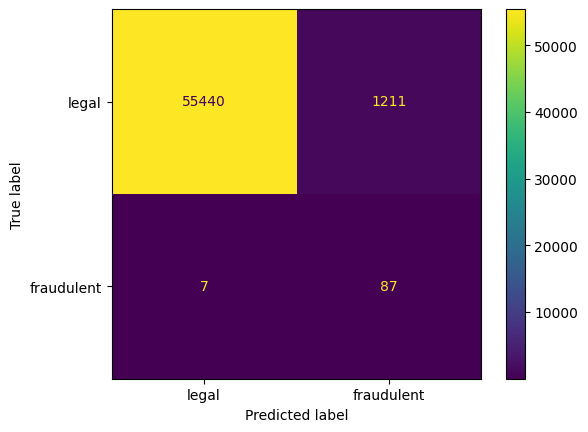

,0,1,macro avg,weighted avg
precision,0.999874,0.067026,0.533450,0.998328
recall,0.978624,0.925532,0.952078,0.978536
f1-score,0.989135,0.125000,0.557067,0.987703
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 4
0    378
1    378
Name: Class, dtype: int64
0    56650
1       95
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56650
           1       0.05      0.91      0.10        95

    accuracy                           0.97     56745
   macro avg       0.53      0.94      0.54     56745
weighted avg       1.00      0.97      0.98     56745

--------------CONFUSION MATRIX--------------



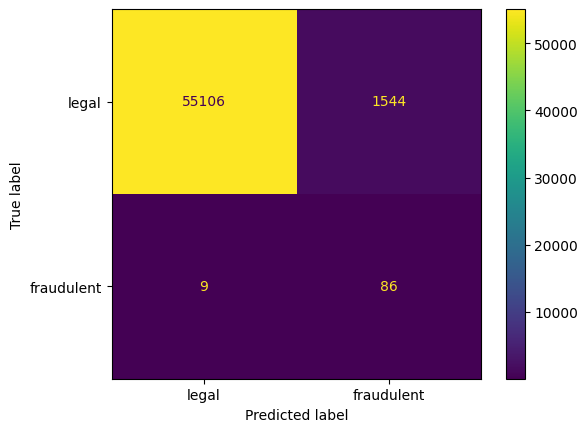

,0,1,macro avg,weighted avg
precision,0.999837,0.052761,0.526299,0.998251
recall,0.972745,0.905263,0.939004,0.972632
f1-score,0.986105,0.099710,0.542907,0.984621
support,56650.000000,95.000000,56745.000000,56745.000000


FOLD 5
0    378
1    378
Name: Class, dtype: int64
0    56650
1       95
Name: Class, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56650
           1       0.06      0.93      0.11        95

    accuracy                           0.97     56745
   macro avg       0.53      0.95      0.55     56745
weighted avg       1.00      0.97      0.99     56745

--------------CONFUSION MATRIX--------------



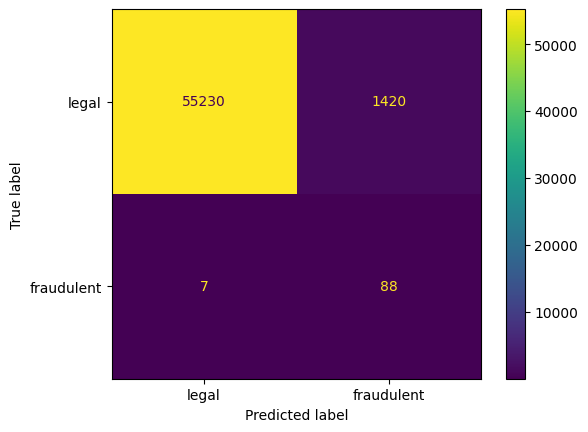

,0,1,macro avg,weighted avg
precision,0.999873,0.058355,0.529114,0.998297
recall,0.974934,0.926316,0.950625,0.974852
f1-score,0.987246,0.109794,0.548520,0.985777
support,56650.000000,95.000000,56745.000000,56745.000000


In [40]:
random_for = RandomForestClassifier(max_depth = 20, random_state = 0)

list_df_metrics = []
fit_time = []
auc_rf = []
acc_rf = []

k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    X_tr_under, y_tr_under = under_sampler.fit_resample(X_tr, y_tr)
    
    print(y_tr_under.value_counts())
    print(y_te.value_counts())
    
    start = time.time()
    random_for.fit(X_tr_under, y_tr_under)
    end = time.time()
    
    fit_time.append(str(round(end-start, 2)))

    y_pred = random_for.predict(X_te)
    
    auc_rf.append(roc_auc_score(y_pred, y_te))
    
    print("--------------CLASSIFICATION REPORT--------------\n")
    cr = classification_report(y_te, y_pred, output_dict = True)
    print(classification_report(y_te, y_pred))
    
    print("--------------CONFUSION MATRIX--------------\n")
    ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels = ['legal','fraudulent'])
    plt.show()
    
    #Store accuracy for test-set
    acc_rf.append(cr['accuracy'])
    
    #Store per-class metrics as a dataframe
    df_metrics = pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'})
    display(df_metrics)
    list_df_metrics.append(df_metrics)
    k += 1
    

#Compute average per-class metrics    
df_concat = pd.concat(list_df_metrics)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_rf_avg = grouped_by_row_index.mean()

#Compute average accuracy
acc_rf_avg = np.mean(acc_rf)

#Compute average AUC and fit time
auc_rf_avg = np.mean(auc_rf) 
fit_time = [float(i) for i in fit_time]
fit_time_rf_avg = np.mean(fit_time)

## PERFORMANCE EVALUATION

In [41]:
display_side_by_side(df_lr_avg, df_nn_avg, titles = ['Logistic Regression', 'Neural Net'])
display_side_by_side(df_rf_avg, titles = ['Random Forest'])

print_auc_acc_metrics(auc_lr_avg, auc_nn_avg, auc_rf_avg, acc_lr_avg, acc_nn_avg, acc_rf_avg)

,0,1,macro avg,weighted avg
f1-score,0.998333,0.463016,0.730674,0.997441
precision,0.999745,0.320246,0.659996,0.998613
recall,0.996925,0.847749,0.922337,0.996676
support,56650.600000,94.600000,56745.200000,56745.200000
,0,1,macro avg,weighted avg
f1-score,0.998579,0.501112,0.749845,0.997750
precision,0.999728,0.360659,0.680193,0.998662
recall,0.997433,0.837200,0.917317,0.997166
support,56650.600000,94.600000,56745.200000,56745.200000


,0,1,macro avg,weighted avg
f1-score,0.986699,0.103927,0.545313,0.985227
precision,0.999826,0.055196,0.527511,0.998251
recall,0.973917,0.898455,0.936186,0.973792
support,56650.600000,94.600000,56745.200000,56745.200000




---------------AUC EVALUATION----------------

AUC LOGISTIC-REGRESSION: 0.6599956231144736

AUC NEURAL NETWORK: 0.6801930281663487

AUC RANDOM FOREST: 0.5275107551112953



---------------ACCURACY EVALUATION----------------

ACCURACY LOGISTIC-REGRESSION: 0.9966763687156496

ACCURACY NEURAL NETWORK: 0.9971662815222377

ACCURACY RANDOM FOREST: 0.9737916347226927



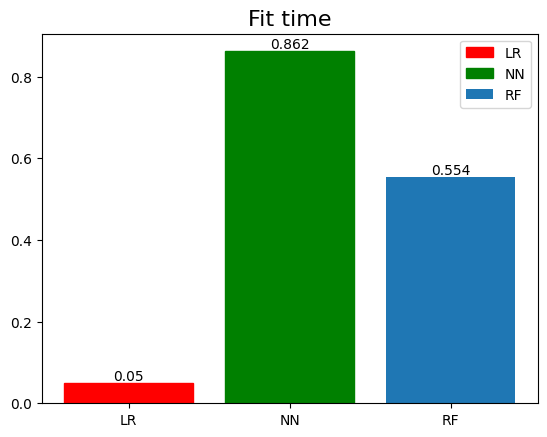

In [42]:
#Plot fit-time of three selected models
fig, ax = plt.subplots()
plot = plt.bar([1,2,3], [fit_time_lr_avg, fit_time_nn_avg, fit_time_rf_avg], label = ['LR', 'NN', 'RF'])
ax.bar_label(plot)
plot[0].set_color('r')
plot[1].set_color('g')
plt.legend(loc = 'best')
plt.xticks([1,2,3], ['LR', 'NN', 'RF'])
plt.title('Fit time', fontsize = 16);
plt.show()

## T-TEST ON 2 BEST CLASSIFIERS (AUC)

In [43]:
#Logistic Regression vs Neural Network
t_test(auc_lr, auc_nn, 0.05)

Cannot reject the null hypothesis
Distributions are not statistically different [ p: 0.27756683139742744 ]
